### <ins>Solutions :</ins>

1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$. 
    - For the random variable White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ :

    We find that $\forall n \in \mathbf{N}$ :  

    $\qquad$ $\mathbb{E}[X_{n}]  = 0$  

    And $\forall h \in \mathbf{N}$ :  

    $\qquad$ $\mathrm{Cov}(X_{n},X_{n+h})$ = $\sigma^{2}\cdot\mathbb{1}_{h=0}$ 

    - For the random variable defined as : $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$, we find: 

    $\qquad$ We find that $\mathbb{E}{[X_{n}]} = a$  

    $\qquad$ $\forall h \in \mathbf{N} : $  $\mathrm{Cov}{(X_{n},X_{n+h})} = b\cdot\mathrm{Cov}{(Z_{n},Z_{n+h-1})}
    +b\cdot\mathrm{Cov}{(Z_{t-1},Z_{t+h})}+\mathrm{Cov}{(Z_{t-1},Z_{t+h-1})} = b\cdot\sigma^{2}\mathbb{1}_{(h=1)\sqcup(h=-1)} + (1+b^{2})\cdot\sigma^{2}\cdot\mathbb{1}_{h=0} $

    - For the random variable defined as : $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough"), we find :  

    $\qquad$ We find that $\mathbb{E}{[X_{n}]} = a$  

    $\qquad$ $\forall h \in \mathbf{N} : \mathrm{Cov}{(\sum_{k=0}^{K}2^{-k}Z_{t-k} + a,\sum_{k=0}^{K}2^{-k}Z_{t-k+h} + a)} =\sum_{k=0}^{K}\sum_{j=0}^{K}2^{-(k+j)}\mathrm{Cov}{(Z_{t-k},Z_{t+k-j})} = \sum_{k=0}^{K}\sum_{j=0}^{K}2^{-(k+j)}
    \cdot\mathbb{1}_{(k-i=-h)}\sigma^{2} = \sum_{k=0, 0\leq k+h \leq K}^{K}2^{-(k+j)}\sigma^{2} $ 

    $\qquad$  if $0 \leq$ h $\leq K$ : $\mathrm{Cov}{(\sum_{k=0}^{K}2^{-k}Z_{t-k} + a,\sum_{k=0}^{K}2^{-k}Z_{t-k+h} + a)} = 
    \sigma^{2}\sum_{k=0}^{K-h} 2^{-2k-h} = \sigma^{2} \cdot 2^{-h}\frac{1-(\frac{1}{4})^{K-k+1}}{\frac{3}{4}}$  

    $\qquad$ if $-K \leq h \leq 0 : \mathrm{Cov}{(\sum_{k=0}^{K}2^{-k}Z_{t-k} + a,\sum_{k=0}^{K}2^{-k}Z_{t-k+h} + a)} = \sigma^{2}\sum_{k=0}^{K-h} 2^{-2k-h} = \sigma^{2} \cdot 2^{h}\frac{1-(\frac{1}{4})^{K-k+1}}{\frac{3}{4}}$  

    $\qquad$ Finally we conclude that :  

    $\qquad$ $\forall h \in \mathbf{N} : \mathrm{Cov}{(\sum_{k=0}^{K}2^{-k}Z_{t-k} + a,\sum_{k=0}^{K}2^{-k}Z_{t-k+h} + a)} = \begin{cases}
        \sigma^{2} \cdot 2^{-|h|}\frac{1-(\frac{1}{4})^{K-k+1}}{\frac{3}{4}} &\text{if} \quad |h| \leq K\\
        0 &\text{otherwise}
    \end{cases}
    $ 
     
    - For the random variable defined as : $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$, we find: 

    $\qquad$ $\mathbb{E}{[X_{n}]} = A_{o}\int_{0}^{2\pi}\cos(\lambda_{o}n + t)dt = 0$  

    $\qquad$ $\forall h \in \mathbf{N}: \mathrm{Cov}{(X_{t},X_{t+h})} = \frac{A_{o}^{2}}{2}\cos(\lambda_{0}h) + \sigma^{2}\mathbb{1}_{h=0}$



2. <ins>Compute their empirical mean and empirical autocovariance function using course's formulas in python.</ins> 

Let us import some useful libraries first.

In [55]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

The functions below calculate the empirical mean and the empirical autocovariance using the Numpy library, which is optimal for such problems.

In [56]:
#This function computes the imperical mean of the random variable
def empirical_mean(X):
    assert(len(X) != 0)
    return np.mean(X)

#This function computes the empirical autocovariance of The random variable, taus is the list of all indexes
def empirical_autocovariance(X, taus, mean=0):
    N = len(X)
    X_sum = np.zeros(len(taus))
    for tau, k in enumerate(taus):
        X_shifted = X[k:N] - mean
        X_original = X[0:N-k] - mean
        X_sum[tau] = 1/(N-k)  * np.sum(X_shifted * X_original)
    return X_sum  

Before starting, let us define some Important code constants that we will be used throught the entirety of this jupyter session. You can modify the LENGHT value in order to plot the desired number of processes.

In [57]:
#Defining the factors of the random variables
LENGHT = 500
K = 100
mean = 0
sigma = 1
a = 1
b = 1
A0 = 1
lambda0 = 1
indexes = np.arange(LENGHT)

- For the random variable White Noise (denoted $\text{WN}$) with variance $\sigma^2$ , we define the following function, that is conviniently called : 'white_nosie'

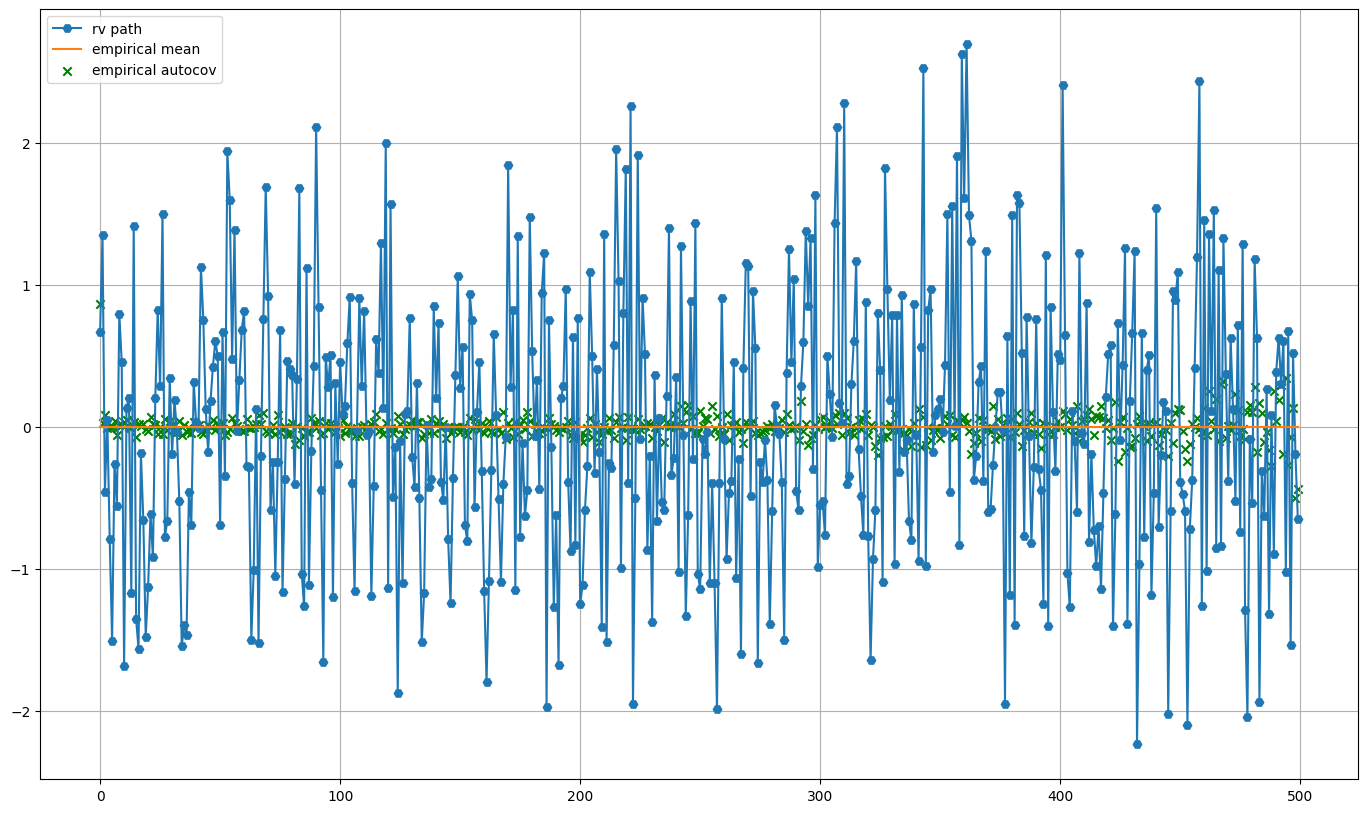

In [58]:
#This here is the white noise variable, defined in the first session TP
def white_nosie(number_var):
    return np.random.normal(mean,sigma, number_var)

#call the white noise function
X_WN = white_nosie(number_var=LENGHT)

#calculate the empirical autocovariance of the white noise for all points going from 0 to the indexes last element
empirical_autocovariance_WN = empirical_autocovariance(X_WN,taus=indexes,mean=0)

#Calculate the empirical mean of the white noise
empirical_mean_WN = empirical_mean(X_WN)

#Plotting the results
plt.figure(figsize=(17,10))
plt.grid()
plt.plot(indexes,X_WN, label='rv path', marker='H')
plt.plot(indexes,np.full_like(indexes,empirical_mean_WN), label='empirical mean')
plt.scatter(indexes,empirical_autocovariance_WN, label='empirical autocov', color='green' , marker = 'x')
plt.legend()
plt.show()

- For the random variable $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$ , we define the following function, that is conviniently called : 'sum_white_noise'

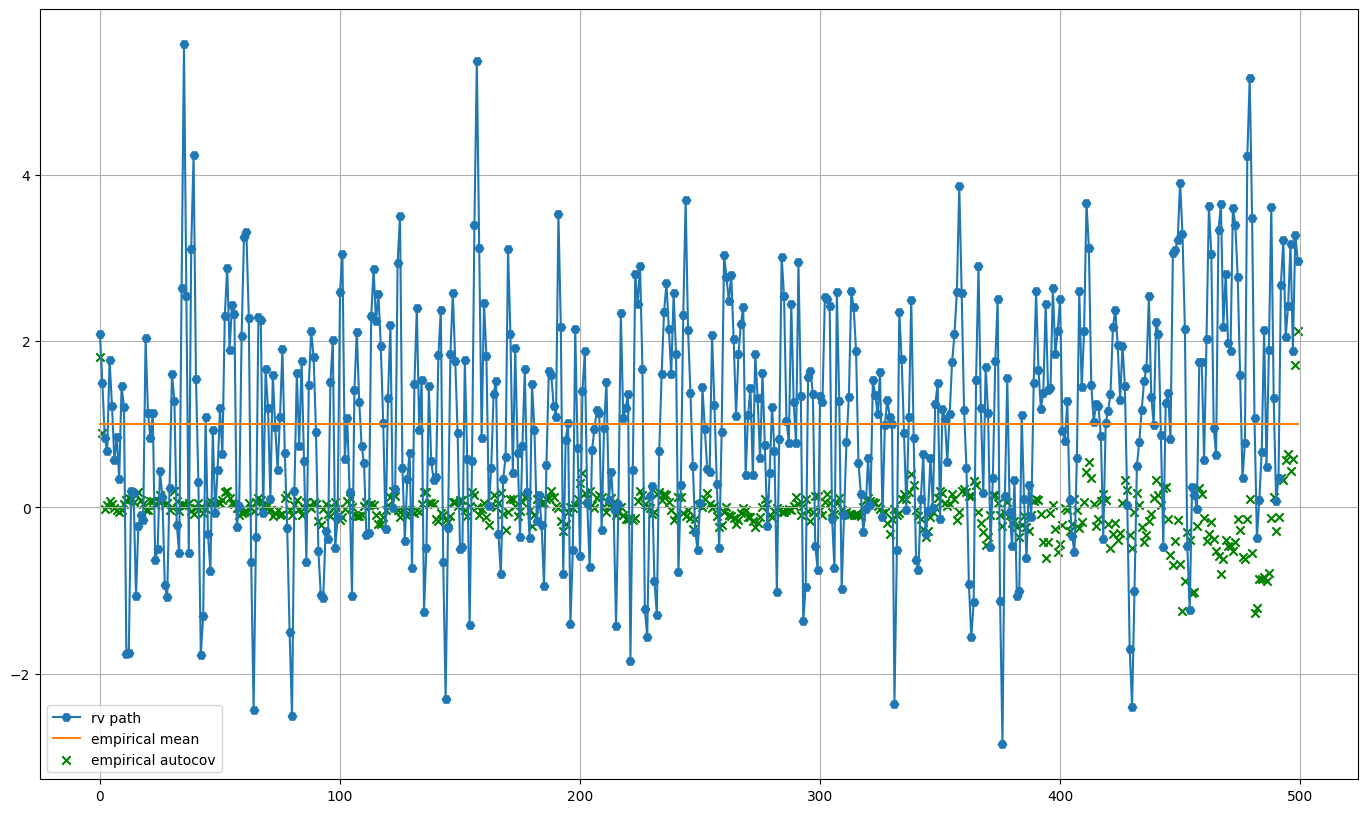

In [59]:
##This here is the second random Variable, defined in the first session TP
##X_t = a +bZ_t-1 + Z_t
def sum_white_noise(number_variable):
    X = white_nosie(number_variable)
    X_1 = white_nosie(number_var=1)
    X_rounded = np.roll(X,1)
    X_rounded = a + b*X + X_rounded
    X_rounded[0] = a + b*X[0] + X_1[0]  
    return X_rounded

#Let us call the sum random variable
X_sum_WN = sum_white_noise(number_variable=LENGHT)

#calculate the empirical autocovariance of the white noise for all points going from 0 to the indexes last element
empirical_mean_sum_WN = empirical_mean(X_sum_WN)

#Calculate the empirical autocovariance of the sum variable 
empirical_autocovariance_sum = empirical_autocovariance(X_sum_WN,mean=1,taus=indexes)

#Plotting the results
plt.figure(figsize=(17,10))
plt.grid()
plt.plot(indexes,X_sum_WN, label='rv path', marker='H')
plt.plot(indexes,np.full_like(indexes,empirical_mean_sum_WN), label='empirical mean')
plt.scatter(indexes,empirical_autocovariance_sum, label='empirical autocov', color='green' , marker = 'x')
plt.legend()
plt.show()


- For the random variable $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough") , we define the following function, that is conviniently called : 'geometric_white_noise'   (It is funnily called 'geometric' because it looks like one and it makes the code more readable)

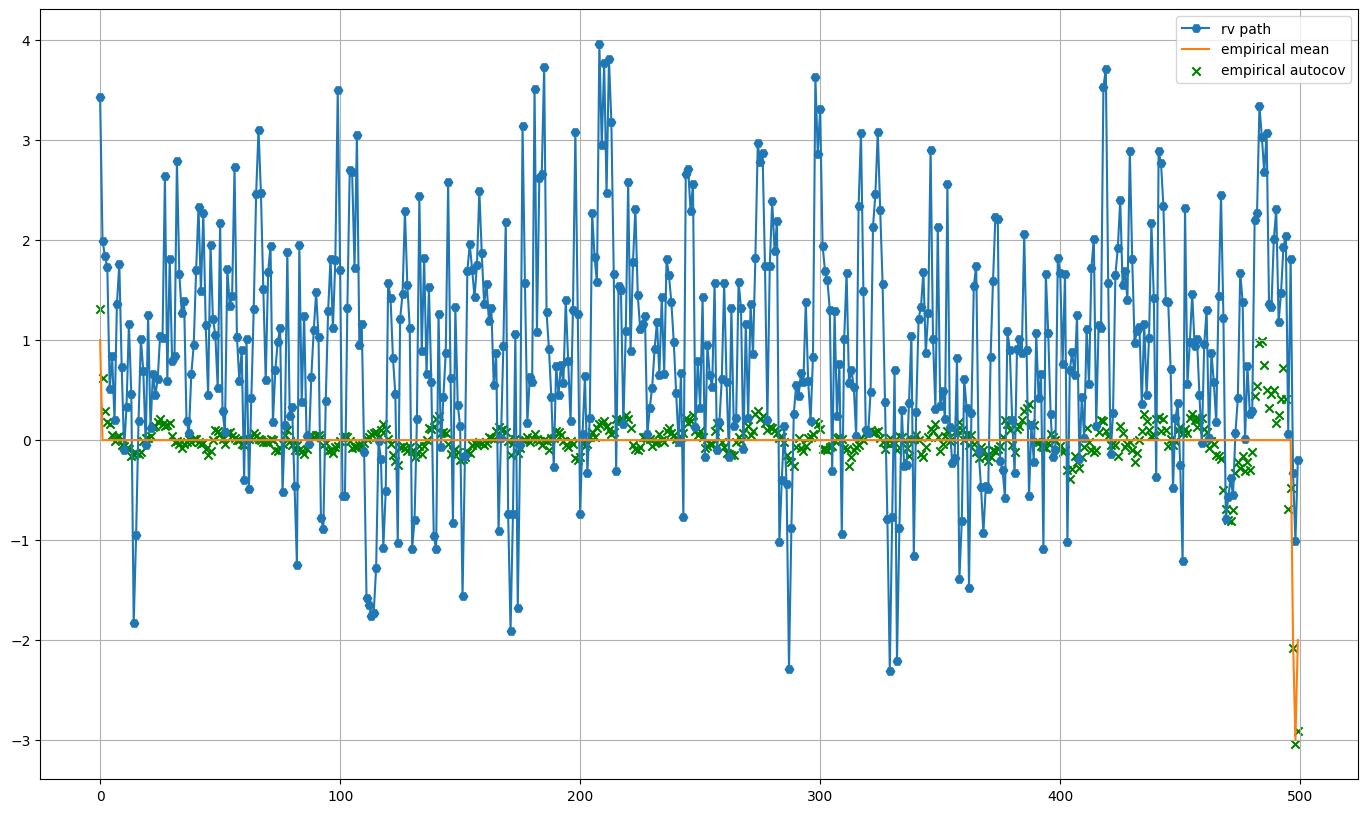

In [60]:
#This one computes the sum of the random variables multiplied by 2 to the power of the variable's indexc
def geometric_white_noise(number_variables):
    X = white_nosie(number_variables+K) # generate a white noise 
    summed_variables = np.zeros(number_variables) # generate array of zeros with the same size of random variable
    # Sum on all of the number of random varibales
    for j in range(number_variables):
        #This index is exactly the random variable defines in the last TP's question

        ##Fixed j => k and it should work now
        summed_variables[j] = np.sum(np.fromiter(((2**-k)*X[j-k+K] for k in range(K+1)),dtype=float))

    return summed_variables + a 

#Let us call the geometric sum random variable
X_sum_geometric_WN = geometric_white_noise(number_variables=LENGHT)

#calculate the empirical autocovariance of the geometric sum white noise for all points going from 0 to the indexes last element
empirical_mean_geo_sum_WN = empirical_mean(X_sum_geometric_WN)

#Calculate the empirical autocovariance of the geometric sum variable 
empirical_autocovariance_geo_sum = empirical_autocovariance(X_sum_geometric_WN,mean=1,taus=indexes)

#Plotting the results 
plt.figure(figsize=(17,10))
plt.grid()
plt.plot(indexes,X_sum_geometric_WN, label='rv path', marker='H')
plt.plot(indexes,np.full_like(indexes,empirical_autocovariance_geo_sum), label='empirical mean')
plt.scatter(indexes,empirical_autocovariance_geo_sum, label='empirical autocov', color='green' , marker = 'x')
plt.legend()
plt.show()

- For the random variable $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ , we define the following function, that is conviniently called : 'cos_noise'.

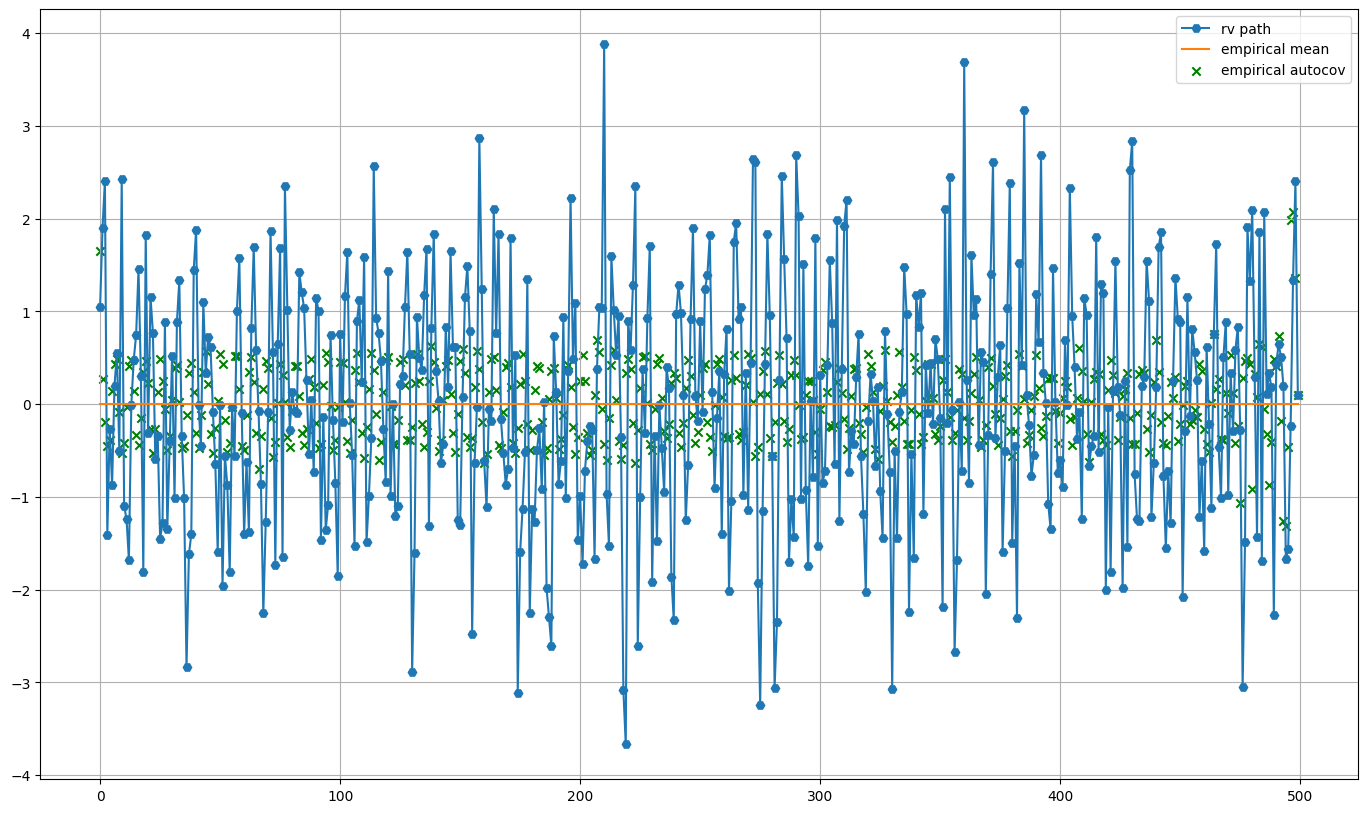

In [61]:
#This function defines the harmonic process in the exercise
def cos_noise(number_variables):
    T=np.arange(0,number_variables) # An array of the number of random variable
    PHI = np.random.uniform(0,2*np.pi)
    return A0*np.cos(lambda0*T+PHI)+np.random.normal(mean,sigma,number_variables) # returns the cos function

#Let us call the harmonic process
X_cos_WN = cos_noise(number_variables=LENGHT)

#theoretical mean of the harmonic process
empirical_mean_cos_WN = empirical_mean(X_cos_WN)

#The empirical autocovariance of the harmonic process
empirical_autocovariance_cos = empirical_autocovariance(X_cos_WN,mean=0,taus=indexes)


#Plotting the results 
plt.figure(figsize=(17,10))
plt.grid()
plt.plot(indexes,X_cos_WN, label='rv path', marker='H')
plt.plot(indexes,np.full_like(indexes,empirical_mean_cos_WN), label='empirical mean')
plt.scatter(indexes,empirical_autocovariance_cos, label='empirical autocov', color='green' , marker = 'x')
plt.legend()
plt.show()


In the case of this last harmonic variable, notice how the empirical values converge ponctually to a sinusoidal function, this shoes that our code is indeed effective and that the empirical value converges to the theoritical one.  

$\qquad$<ins>However</ins>, there is a catch to this empirical implementation !

In the function definition, notice how we divide by $\frac{1}{N-k}$, this is used to circumvente the 'Infinity question'. We can not compute numbers that are infinitely large, $N-k$ is used to correctly normalise the values. The execution of the code without the $\frac{1}{N-k}$ will result in the convergence to zero of the previous example ! Which in of course not correct !
 

3. <ins>Plot the theoretical operator and empirical estimators for various sampling many times and comment.</ins>  

Down below we compute the theoritical autocovariance ofthe random variables defined above, the goal here is to compare the plot results to the empirical values computed above. We will plot the results one by one.


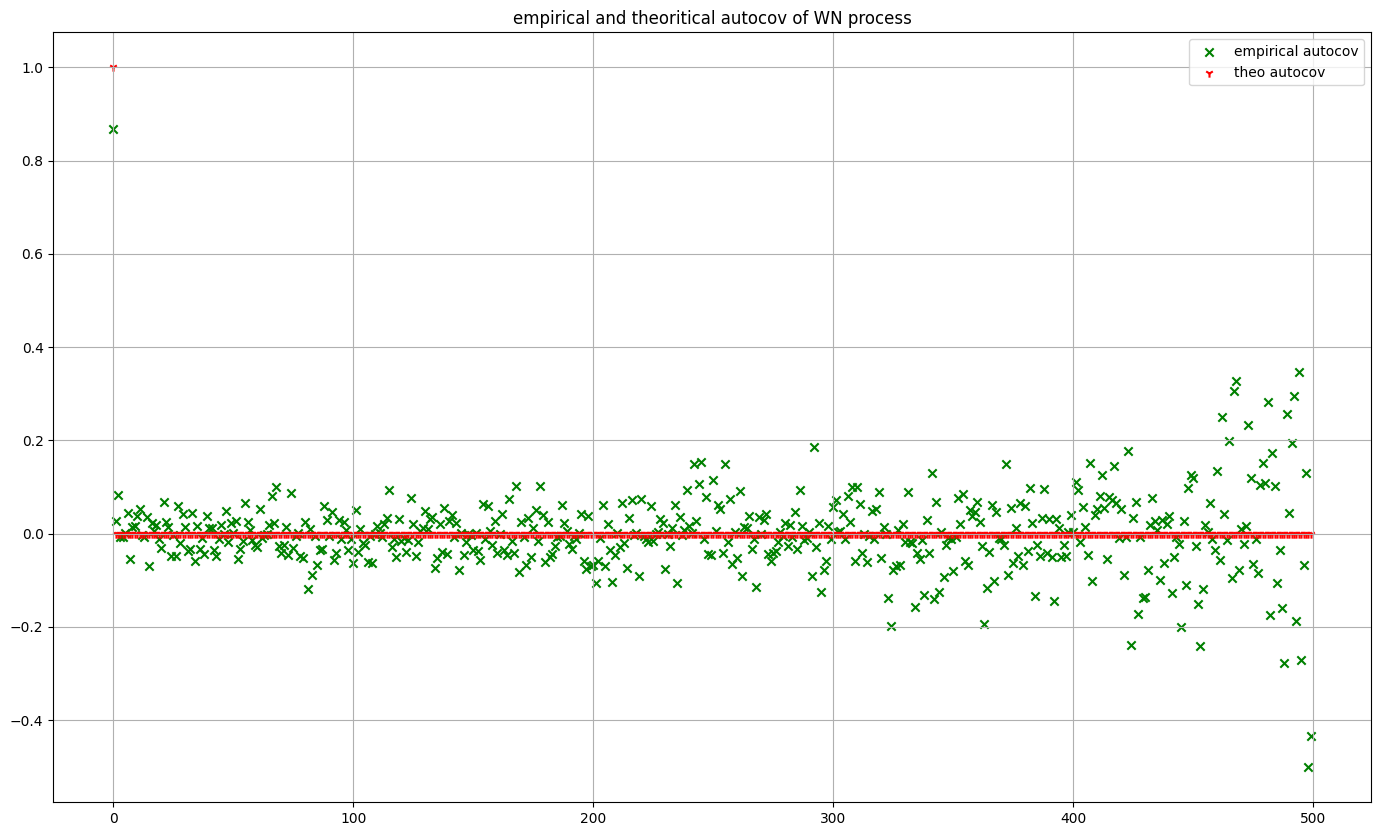

In [62]:
#This function return theoretical autocov of WN
def theoretical_autocov_WN(X):
    autocov = np.zeros_like(X)
    autocov[0] = sigma**2
    return autocov

#getting the theoretical autocovariance
theoretical_autocovariance_WN = theoretical_autocov_WN(X_WN)

#Plotting the results
#plotting the empirical mean of various random variables 
plt.figure(figsize=(17,10))
plt.grid()
plt.title('empirical and theoritical autocov of WN process')
plt.scatter(indexes,empirical_autocovariance_WN, label='empirical autocov', color='green' , marker = 'x')
plt.scatter(indexes,theoretical_autocovariance_WN,label='theo autocov', color='red', marker='1')
plt.legend()
plt.show()

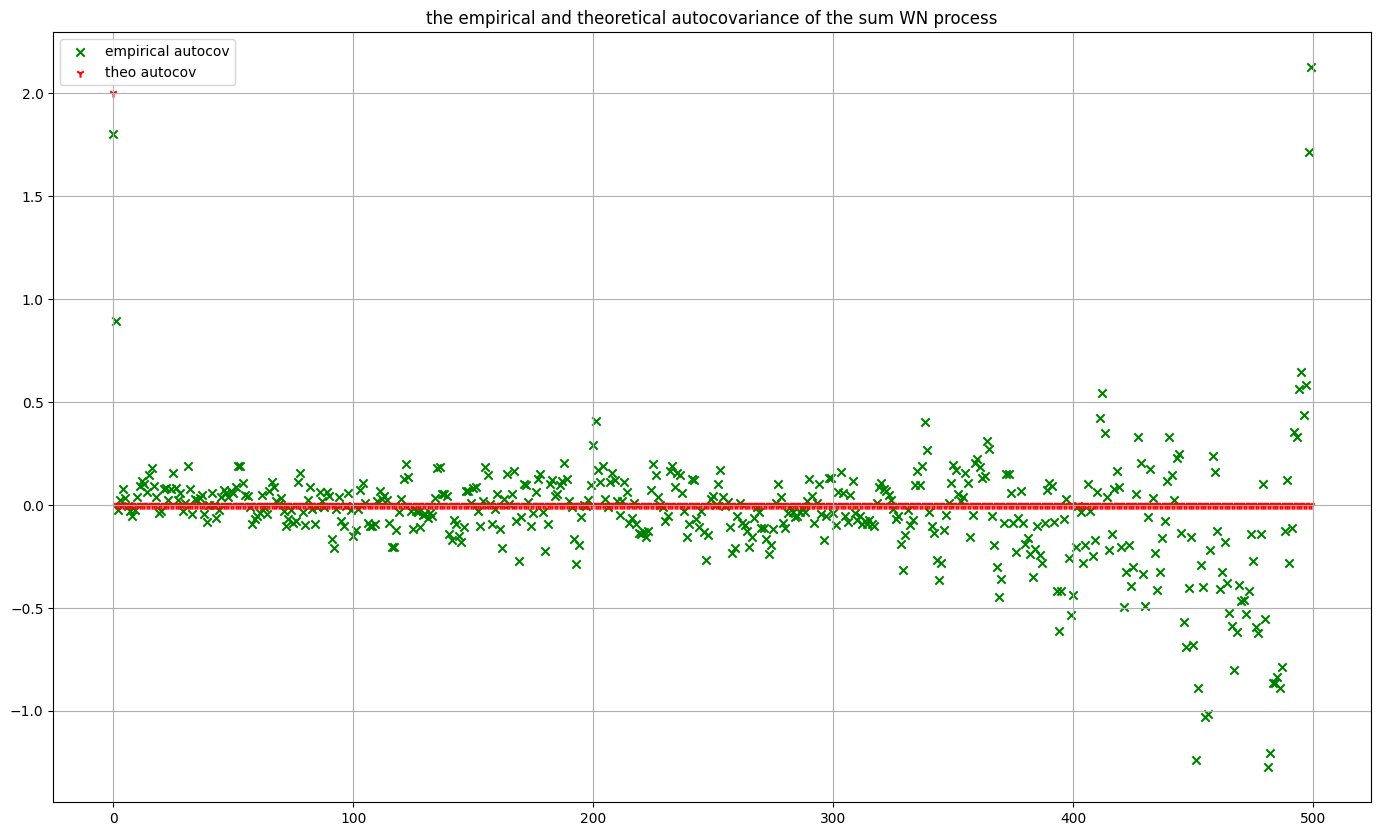

In [63]:
#This one for the sum of WN
def theoretical_autocov_sum_WN(X):
    autocov = np.zeros_like(X)
    autocov = np.where((autocov == 1) | (autocov == len(X)), b**2 * sigma**2, 0)
    autocov[0] = (1+b**2)*sigma**2
    return autocov

#Getting the theoretical autocov of the sum of WN
theoretical_autocovariance_sum = theoretical_autocov_sum_WN(X_sum_WN)

#Plotting the results and comparing
#plotting the empirical mean of various random variables 
plt.figure(figsize=(17,10))
plt.grid()
plt.title('the empirical and theoretical autocovariance of the sum WN process')
plt.scatter(indexes,empirical_autocovariance_sum, label='empirical autocov', color='green' , marker = 'x')
plt.scatter(indexes,theoretical_autocovariance_sum,label='theo autocov', color='red', marker='1')
plt.legend()
plt.show()

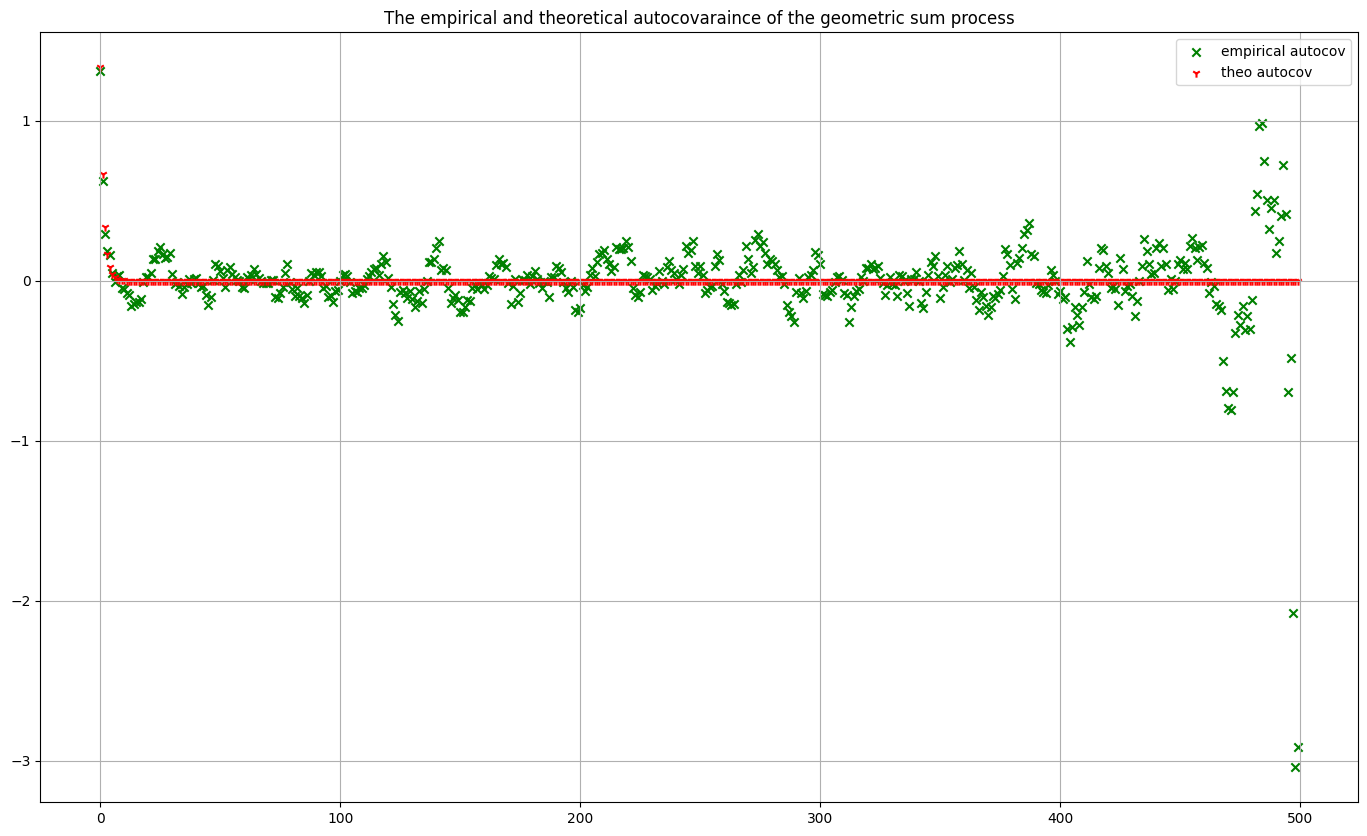

In [64]:
#This one for the geometric sum of WN
def theoretical_autocov_geo_sum_WN(X):
    autocov = np.zeros_like(X)
    for j in range(len(X)):
        if abs(j) <= K:
            autocov[j] = (sigma**2)* (2**-abs(j))*((1-(1/4)**(K-j+1)))/(3/4)
        else:
            autocov[j] = 0
    return autocov

#Getting the theoretical autocov of the geometric sum of WN
theoretical_autocovariance_geo_sum = theoretical_autocov_geo_sum_WN(X_sum_geometric_WN)

#plotting the empirical mean of various random variables 
plt.figure(figsize=(17,10))
plt.grid()
plt.title('The empirical and theoretical autocovaraince of the geometric sum process')
plt.scatter(indexes,empirical_autocovariance_geo_sum, label='empirical autocov', color='green' , marker = 'x')
plt.scatter(indexes,theoretical_autocovariance_geo_sum,label='theo autocov', color='red', marker='1')
plt.legend()
plt.show()

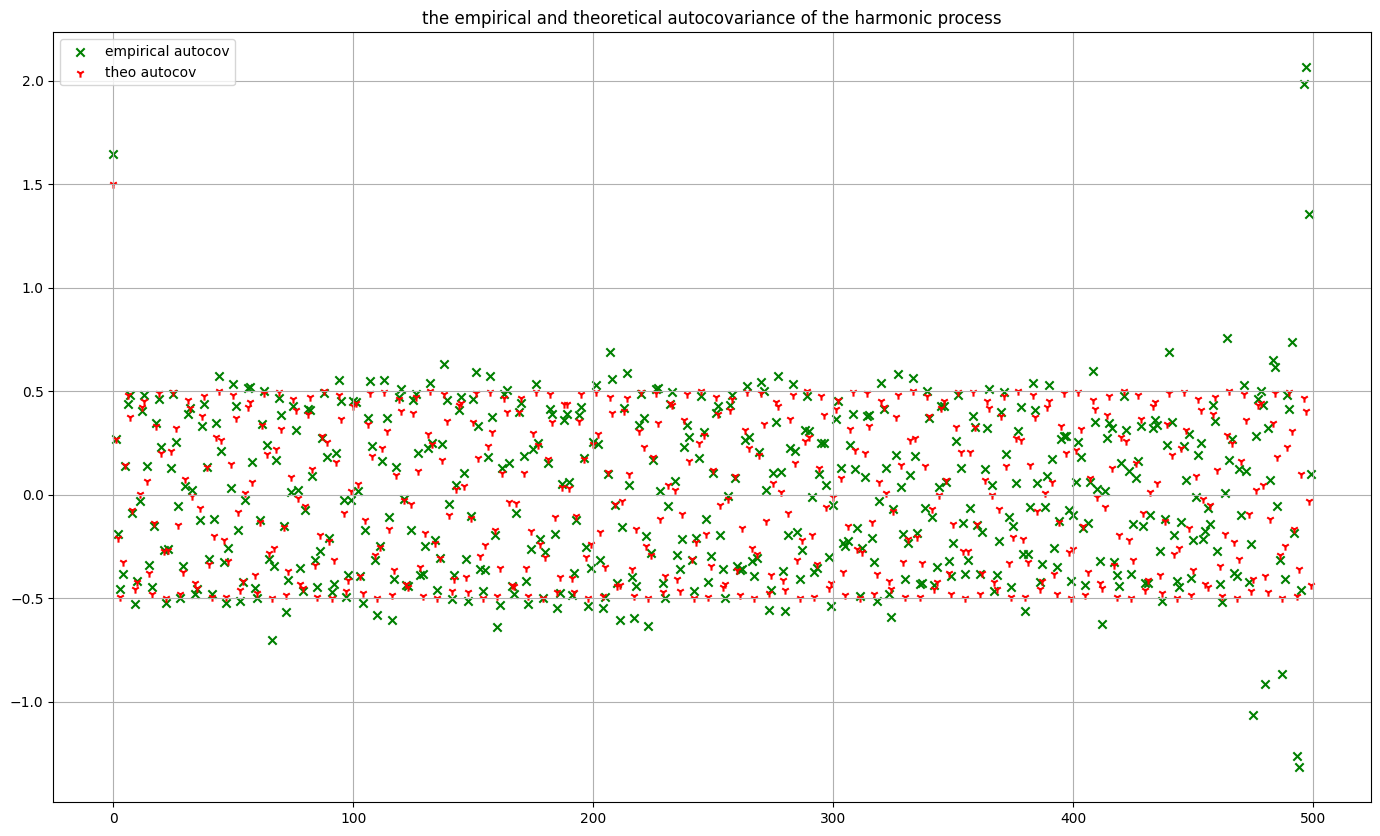

In [65]:
#This one for the autocov of cos
def theoretical_autocov_cos_WN(X):
    autocov = np.zeros_like(X)
    autocov[0] = sigma**2 + (1/2) * (A0**2)
    for j in range(1,len(X)):
        autocov[j] = (1/2) * (A0**2) * (np.cos(lambda0*j))
    return autocov

#getting the empirical autocov of the harmonic random variable
theoretical_autocovariance_cos = theoretical_autocov_cos_WN(X_cos_WN)

#plotting the empirical mean of various random variables 
plt.figure(figsize=(17,10))
plt.grid()
plt.title('the empirical and theoretical autocovariance of the harmonic process')
plt.scatter(indexes,empirical_autocovariance_cos, label='empirical autocov', color='green' , marker = 'x')
plt.scatter(indexes,theoretical_autocovariance_cos,label='theo autocov', color='red', marker='1')
plt.legend()
plt.show()

As we can see, the theoretical autocovariance does match the empirical autocovariance fot most points, the reason why we get huge varaition at the right end limite of our intervale, is because it is computing the value at 0 which is not null.

There would be lower MSE if we increase the number of points , ie the number of random variables, in our simulation. This is the goal of the next question down below !

4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.

Down below we add Lists of all the MSEs that we will be counting and plotting

In [66]:
#List of all MSEs
MSE_WN =[]
MSE_SUM_WN = []
MSE_GEO_SUM_WN = []
MSE_COS = []

We now iterate ${10,100,500,100}$ times in order to calculate the MSE , to store them and finally to plot the boxplot of the reuslts.

In [67]:
#Mean square estimation
for T in [10,100,500,1000]:
    mse_wn_inter = []
    mse_sum_wn_inter = []
    mse_geo_wn_inter = []
    mse_cos_wn_inter = []
    for step in range(100):
        X_WN = white_nosie(number_var=T)
        X_sum_WN = sum_white_noise(number_variable=T)
        X_sum_geometric_WN = geometric_white_noise(number_variables=T)
        X_cos_WN = cos_noise(number_variables=T)

        theoretical_autocovariance_WN = theoretical_autocov_WN(X_WN)[0:T]
        theoretical_autocovariance_sum = theoretical_autocov_sum_WN(X_sum_WN)[0:T]
        theoretical_autocovariance_geo_sum = theoretical_autocov_geo_sum_WN(X_sum_geometric_WN)[0:T]
        theoretical_autocovariance_cos = theoretical_autocov_cos_WN(X_cos_WN)[0:T]

        empirical_autocovariance_WN = empirical_autocovariance(X_WN,taus=np.arange(T),mean=0)
        empirical_autocovariance_sum = empirical_autocovariance(X_sum_WN,mean=1, taus=np.arange(T))
        empirical_autocovariance_geo_sum = empirical_autocovariance(X_sum_geometric_WN,mean=1,taus=np.arange(T))
        empirical_autocovariance_cos = empirical_autocovariance(X_cos_WN,mean=0,taus=np.arange(T))

        mse_wn_inter.append(np.mean((theoretical_autocovariance_WN-empirical_autocovariance_WN)**2))
        mse_sum_wn_inter.append(np.mean((theoretical_autocovariance_sum-empirical_autocovariance_sum)**2))
        mse_geo_wn_inter.append(np.mean((theoretical_autocovariance_geo_sum-empirical_autocovariance_geo_sum)**2))
        mse_cos_wn_inter.append(np.mean((theoretical_autocovariance_cos-empirical_autocovariance_cos)**2))

    
    MSE_WN.append(mse_wn_inter)
    MSE_SUM_WN.append(mse_sum_wn_inter)
    MSE_GEO_SUM_WN.append(mse_geo_wn_inter)
    MSE_COS.append(mse_cos_wn_inter)


We will plot all of the results one by one for readability.

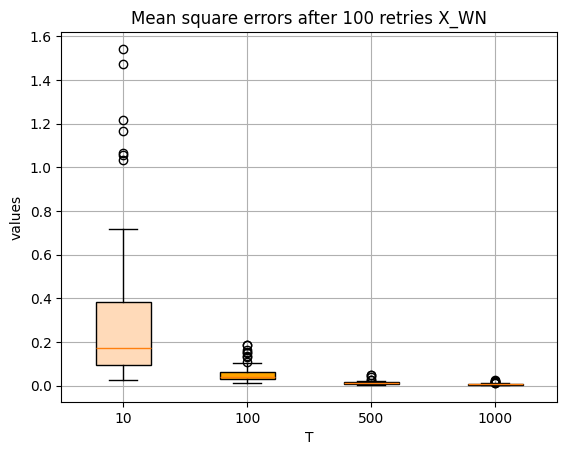

In [68]:
# Plotting the MSE for each T defined in the TP, we will start with the WN

LABELS = ['10','100','500','1000']
COLORS = ['peachpuff', 'orange', 'tomato','pink']
plt.grid()
ax = plt.boxplot(MSE_WN,patch_artist=True,tick_labels=LABELS)
plt.xlabel('T')
plt.ylabel('values')
plt.title(f'Mean square errors after 100 retries X_WN')

#plt.boxplot(MSE_WN,patch_artist=True,tick_labels=LABELS)
for patch, color in zip(ax['boxes'], COLORS):
    patch.set_facecolor(color)
plt.show()

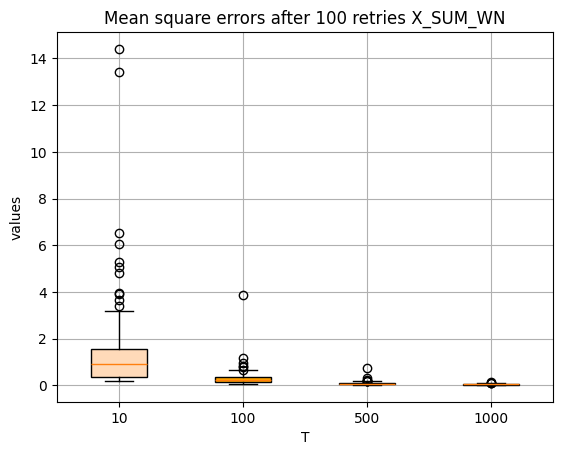

In [69]:
# Plotting the MSE for each T defined in the TP, we will start with the sum WN process

LABELS = ['10','100','500','1000']
COLORS = ['peachpuff', 'orange', 'tomato','pink']
plt.grid()
ax = plt.boxplot(MSE_SUM_WN,patch_artist=True,tick_labels=LABELS)
plt.xlabel('T')
plt.ylabel('values')
plt.title(f'Mean square errors after 100 retries X_SUM_WN')

#plt.boxplot(MSE_WN,patch_artist=True,tick_labels=LABELS)
for patch, color in zip(ax['boxes'], COLORS):
    patch.set_facecolor(color)
plt.show()

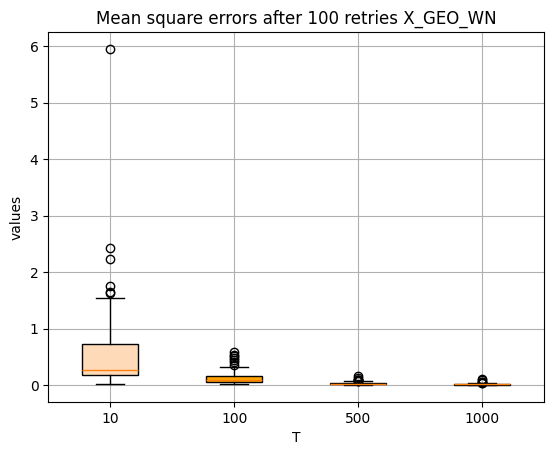

In [70]:
# Plotting the MSE for each T defined in the TP, here we have the geometric sum process

LABELS = ['10','100','500','1000']
COLORS = ['peachpuff', 'orange', 'tomato','pink']
plt.grid()
ax = plt.boxplot(MSE_GEO_SUM_WN,patch_artist=True,tick_labels=LABELS)
plt.xlabel('T')
plt.ylabel('values')
plt.title(f'Mean square errors after 100 retries X_GEO_WN')

#plt.boxplot(MSE_WN,patch_artist=True,tick_labels=LABELS)
for patch, color in zip(ax['boxes'], COLORS):
    patch.set_facecolor(color)
plt.show()

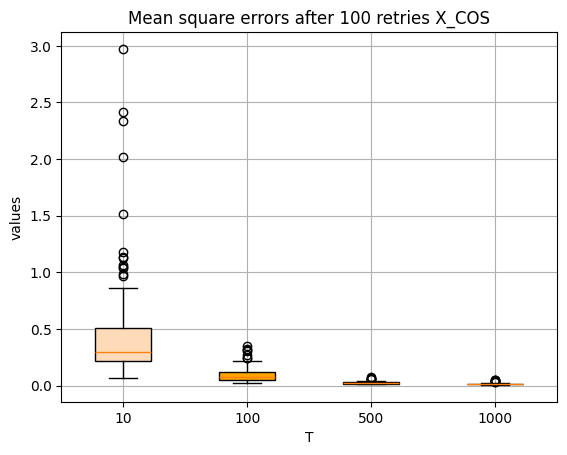

In [71]:
# Plotting the MSE for each T defined in the TP, here wi have the harmonic process

LABELS = ['10','100','500','1000']
COLORS = ['peachpuff', 'orange', 'tomato','pink']
plt.grid()
ax = plt.boxplot(MSE_COS,patch_artist=True,tick_labels=LABELS)
plt.xlabel('T')
plt.ylabel('values')
plt.title(f'Mean square errors after 100 retries X_COS')

#plt.boxplot(MSE_WN,patch_artist=True,tick_labels=LABELS)
for patch, color in zip(ax['boxes'], COLORS):
    patch.set_facecolor(color)
plt.show()

Above are all the results of the iterations, the dots on each graph represent the Variance of the MSE result, the boxes represent the intervale of the values taken by the MSE and finally the streaight line in all of the boxes are the mean of the MSEs.

We notice that for 10 iteration, the variation of the MSE is huge, the values taken by the MSE is in a bigger intervale and the mean is non null. We notice by increasing the number of random variables, the varaince of the MSE decreases, reaching almost null values and thta the mean of all the error are close to zero.

We conclude that by adding more processes, we converge almos surely to the exepcted value of the MSE , that is 0. This correspondes with the theoretical results and the empirical results of the last questions.